In [ ]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
!pip3 install plotly
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##There are no missing values in the dataset

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


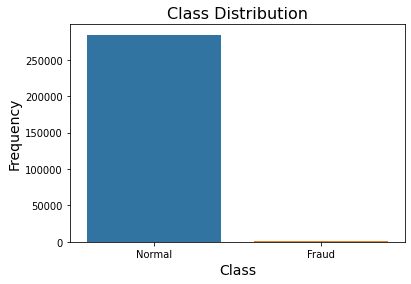

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Class", data=df)
plt.title('Class Distribution', fontsize=16);
ax.set_xticklabels(['Normal','Fraud'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

##There are 284315 normal transactions (99.828%) as opposed to 492 fraud transactions (0.172%). So clearly there is an imbalance in the dataset which may adversely affect the performance of our ML models. Thus we will have to use some techniques to counter this data imbalance


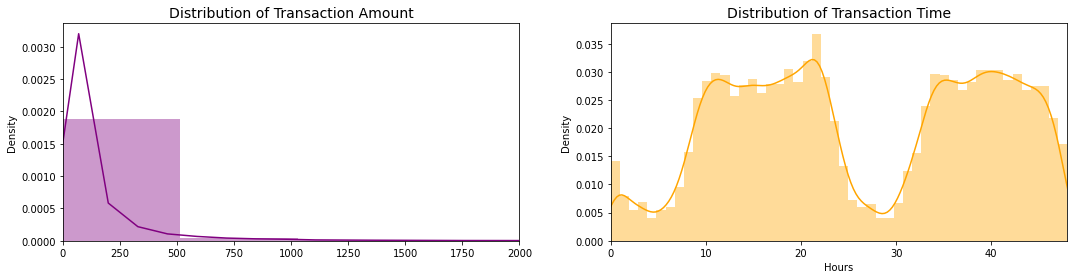

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='purple')
plt.xlabel('Amount in dollars')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), 2000])
sns.distplot(time_val/(60*60), ax=ax[1], color='orange')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
plt.xlabel('Hours')
ax[1].set_xlim([min(time_val/(60*60)), max(time_val)/(60*60)])
plt.show()

##Going by the drop in the amount of transactions at 0 hrs and then again after around 24 hrs, we may infer that the it corresponds to night time when people are mostly asleep. We can say that most of the transactions occurred during the day.


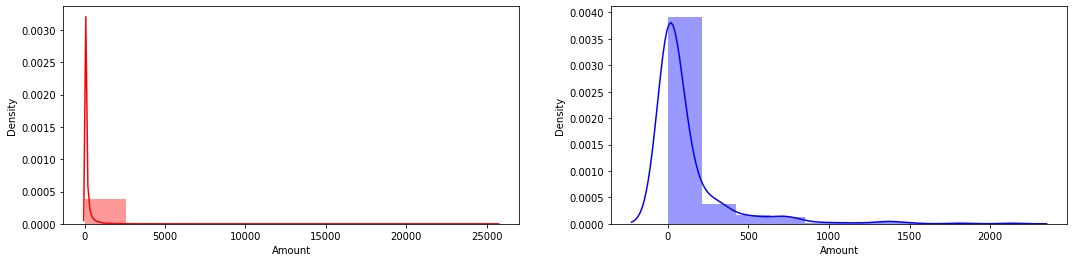

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
plt.subplot(1,2,1)
sns.distplot(df_nonfraud['Amount'],bins=10,color='red');
plt.subplot(1,2,2)
sns.distplot(df_fraud['Amount'],bins=10,color='blue');
plt.show()

#The average amount transacted in normal cases is 88.29 USD while in fraud cases, it is 122.21 USD.
#Also, from the plot below, we can see that the outliers in case of fraudulent cases are of less amount as compared to normal transactions.

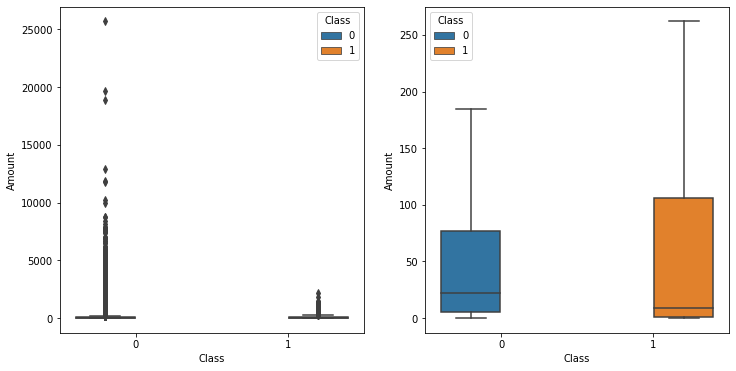

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df,showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df,showfliers=False)
plt.show();

In [ ]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds
# Summarize statistics and see differences between fraud and normal transactions
print('Statistics of normal cases:')
df_nonfraud.Amount.describe()

Statistics of normal cases:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
print('Statistics of fraud cases:')
df_fraud.Amount.describe()

Statistics of fraud cases:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
not_fraud = df.loc[df['Class'] == 0]["Time"]/(60*60)
fraud = df.loc[df['Class'] == 1]["Time"]/(60*60)

hist_data = [not_fraud, fraud]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot for Fraudulent and Non Fraudulent cases', xaxis=dict(title='Time [hrs]'))
iplot(fig, filename='dist_only')

##Fraudulent transactions are more equally distributed in time as compared to normal transactions.

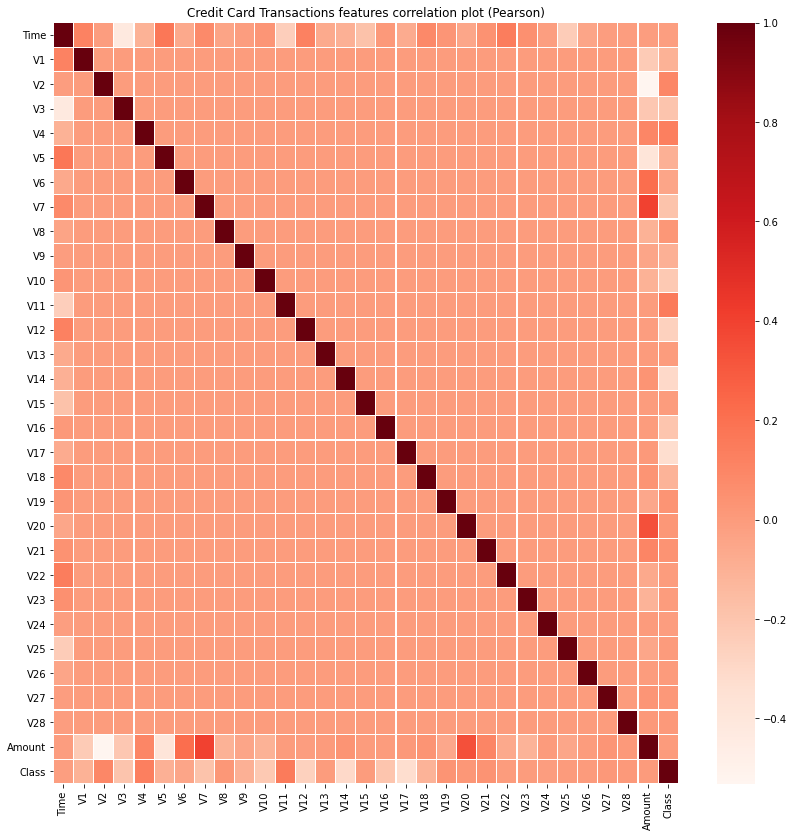

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

There is no significant correlation between features V1-V28. There are certain correlations between some of these features and Time (negative correlation with V3) and Amount (direct correlation with V7 and V20, negative correlation with V2 and V5). Also there is some negative correlation between V17 and Class.

## A credit card company wants to watch as much fraud as possible(reduce false negatives;**Recall**) as fraudulent transactios can be very costly and a false alarm means someone's transaction is blocked(reduce false positives;**Precision**). The credit card company therefore wants to **optimize** both recall and precision. **F1-score** takes into account a balance between precision and recall.

# **SUPPORT VECTOR MACHINE**

In [ ]:
df = pd.read_csv('creditcard.csv')
X=df.drop(columns='Class')
y=df['Class']
scalar = StandardScaler()
X = df.drop('Class', axis=1)
y = df.Class
X = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
model_svc = SVC()
model_svc.fit(X_train, y_train)
model_svc.score(X_train,y_train)
model_svc.score(X_test,y_test)

0.999385555282469

In [ ]:
y_predict = model_svc.predict(X_test)
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))
print('F1 score: ',metrics.f1_score(y_test,y_predict))
print('ROCAUC score: ',metrics.roc_auc_score(y_test,y_predict))
print('Precision: ',metrics.precision_score(y_test,y_predict))
print('Recall: ',metrics.recall_score(y_test,y_predict))

Accuracy:  0.999385555282469
F1 score:  0.7586206896551724
ROCAUC score:  0.8160655803966148
Precision:  0.9482758620689655
Recall:  0.632183908045977


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,55,32
is Normal,3,56872


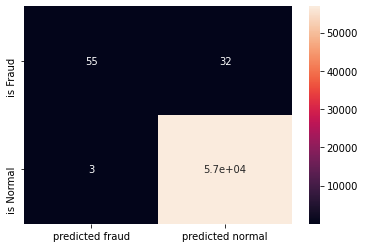

In [ ]:
sns.heatmap(confusion, annot=True);

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



# **LOGISTIC REGRESSION**

In [ ]:
data_df=pd.read_csv("creditcard.csv")

In [ ]:
def logsolver_opt(x,y,TEST_SIZE,ERROR):
    RANDOM_STATE = 2021

    xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    clf = LogisticRegression()
    clf.fit(xtrain, ytrain)

    if ERROR=="VAL":                        #Validation Error
        y_pred = clf.predict(xvalid)
        F_score=f1_score(yvalid, y_pred)
        ROC=roc_auc_score(yvalid, y_pred)
        return F_score,ROC

    elif ERROR=="TRAIN":                    #Training Error
        y_pred = clf.predict(xtrain)
        F_score = f1_score(ytrain, y_pred)
        ROC = roc_auc_score(ytrain, y_pred)
        return F_score, ROC

In [ ]:
std_scalar = StandardScaler()
#V1-V28 are already othronormalised features, so we need to normalise amount and time

data_df['Amount'] = std_scalar.fit_transform(data_df['Amount'].values.reshape(-1,1))
data_df['Time'] = std_scalar.fit_transform(data_df['Time'].values.reshape(-1,1))

x = data_df.drop(columns='Class') #Features
y = data_df['Class']              #Labels

RANDOM_STATE = 2021

x, xtest, y, ytest = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

## Case 1: When whole data set is used for training

## We will now check how the train and validation F1 score vary with the split ratio between train and validation set.

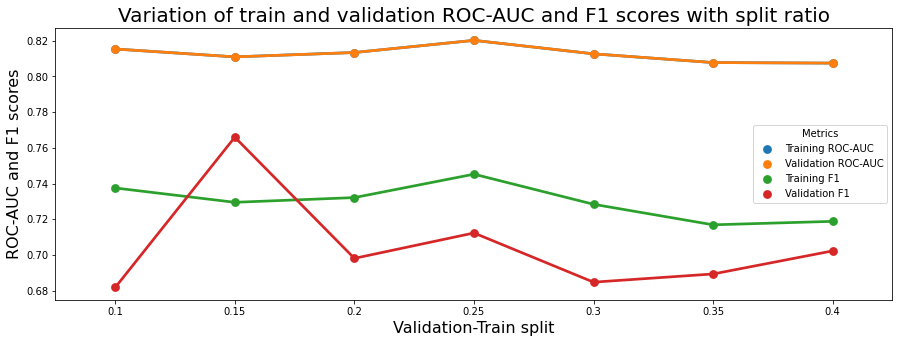

In [ ]:
  roc_train_log = []
f_train_log = []
roc_val_log = []
f_val_log = []
split = [0.1,0.15,0.2, 0.25, 0.3, 0.35, 0.4]
for i in split:
    f_train,roc_train=logsolver_opt(x,y,i,"TRAIN")
    f_val,roc_val=logsolver_opt(x,y,i,"VAL")
    roc_train_log.append(roc_train)
    f_train_log.append(f_train)
    roc_val_log.append(roc_val)
    f_val_log.append(f_val)
Split_logreg = {"Training ROC-AUC": roc_train_log, "Validation ROC-AUC": roc_train_log, "Training F1": f_train_log,"Validation F1": f_val_log, "Split": split}
Split_logreg_df = pd.DataFrame.from_dict(Split_logreg)

plot_df = Split_logreg_df.melt('Split', var_name='Metrics', value_name="Values")
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Split", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.xlabel('Validation-Train split', fontsize=16)
plt.ylabel('ROC-AUC and F1 scores', fontsize=16)
plt.title('Variation of train and validation ROC-AUC and F1 scores with split ratio', fontsize=20)
plt.show()

## We can see that: 
F1 score on validation set is **maximised** when the split raatio is **0.15**

In [ ]:
#lets calculate scoring parameters
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.15, random_state=RANDOM_STATE)
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

accur = accuracy_score(ytest, y_pred)
F_score = f1_score(ytest, y_pred)
ROC = roc_auc_score(ytest, y_pred)
prec = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
print("When whole dataset is trained")
print("F1 score :", F_score)
print("ROC-AUC :", ROC)
print("Precision :", prec)
print("Recall :", recall)
print("Accuracy :", accur)

When whole dataset is trained
F1 score : 0.7052023121387283
ROC-AUC : 0.7960373617108032
Precision : 0.8714285714285714
Recall : 0.5922330097087378
Accuracy : 0.9991046662687406


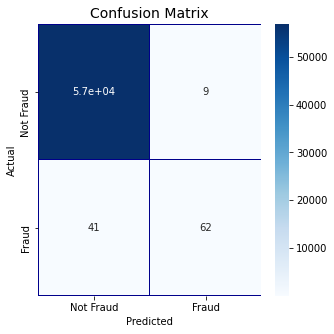

In [ ]:
# Confusion Matrix
cm = pd.crosstab(ytest, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))
sns.heatmap(cm, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'],annot=True, ax=ax1, linewidths=.2, linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Case 2: When random undersampling is used
Our model is biased towards non fraud cases because there are 99% of these
So as to avoid these we will sample such that no of fraud and no of non fraud cases are equal



In [ ]:

fraud  = data_df.loc[data_df['Class'] == 1]
non_fraud = data_df.loc[data_df['Class'] == 0]

no_of_fraud=fraud.shape[0] #no of fraud cases
non_fraud=non_fraud.sample(n=no_of_fraud,random_state=2)

data=pd.concat([fraud,non_fraud])
data = data.sample(frac=1, random_state=5)
#shuffling data set because when we concat, class with 0 and 1 attributes are together

x = data.drop(columns='Class')
y = data['Class']
# But by sampling, our dataset upon which the model is trained is reduced significantly beacuse no of fraud cases =492
RANDOM_STATE = 2021
x, xtest, y, ytest = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)


## We will now check how the train and validation F1 score vary with the split ratio between train and validation set.

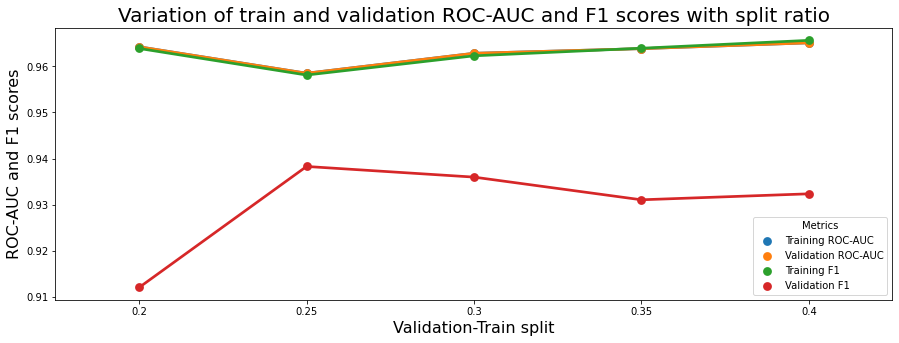

In [ ]:
# Now lets find the optimal split ratio
roc_train_log = []
f_train_log = []
roc_val_log = []
f_val_log = []
split = [0.2, 0.25, 0.30, 0.35, 0.4]
for i in split:
    f_train, roc_train = logsolver_opt(x, y, i, "TRAIN")
    f_val, roc_val = logsolver_opt(x, y, i, "VAL")
    roc_train_log.append(roc_train)
    f_train_log.append(f_train)
    roc_val_log.append(roc_val)
    f_val_log.append(f_val)
Split_logreg = {"Training ROC-AUC": roc_train_log, "Validation ROC-AUC": roc_train_log, "Training F1": f_train_log,
                "Validation F1": f_val_log, "Split": split}
Split_logreg_df = pd.DataFrame.from_dict(Split_logreg)

plot_df = Split_logreg_df.melt('Split', var_name='Metrics', value_name="Values")
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Split", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.xlabel('Validation-Train split', fontsize=16)
plt.ylabel('ROC-AUC and F1 scores', fontsize=16)
plt.title('Variation of train and validation ROC-AUC and F1 scores with split ratio', fontsize=20)
plt.show()

## We can see that: 
F1 score on validation set is **maximised** when the split ratio is **0.25**

## Therefore, now we will test the performance of these parameters (which we obtained above) on our test data.

*   Split = **0.25**

When sampling is done
F1 score : 0.9441624365482234
ROC-AUC : 0.9453560371517027
Precision : 0.9789473684210527
Recall : 0.9117647058823529
Accuracy : 0.9441624365482234


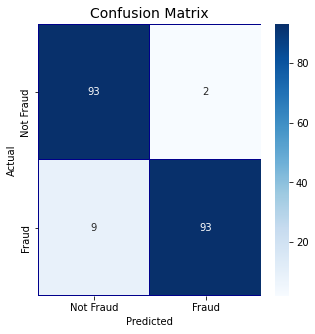

In [ ]:
# lets calculate scoring parameters
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.25, random_state=RANDOM_STATE)
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

accur = accuracy_score(ytest, y_pred)
F_score = f1_score(ytest, y_pred)
ROC = roc_auc_score(ytest, y_pred)
prec = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
print("When sampling is done")
print("F1 score :", F_score)
print("ROC-AUC :", ROC)
print("Precision :", prec)
print("Recall :", recall)
print("Accuracy :", accur)
# Confusion Matrix
cm = pd.crosstab(ytest, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))
sns.heatmap(cm, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'],annot=True, ax=ax1, linewidths=.2, linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# **AdaBoost**

In [ ]:
data_df=pd.read_csv("creditcard.csv")

RANDOM_STATE=2021                 #random seed
X = data_df.drop(columns='Class') #Features
y = data_df['Class']             #Labels

In [ ]:
############# Separating Test Data from Original Data ##############
X_T, X_test, y_T, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## We will now check how the train and validation F1 score vary with the split ratio between train and validation set.

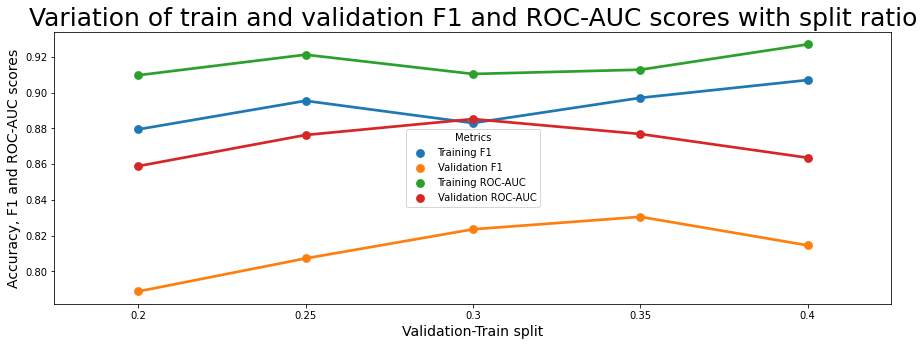

In [ ]:

#Will we now find the optimal split ratio for our dataset
train_f1_ada = []
val_f1_ada = []
train_roc_ada=[]
val_roc_ada=[]
split = [0.2, 0.25,0.3,0.35,0.4]

for i in split:
    x_train, x_valid, y_train, y_valid = train_test_split(X_T, y_T, test_size=i, random_state=RANDOM_STATE)
    clf = AdaBoostClassifier(random_state=RANDOM_STATE, learning_rate=1, n_estimators=200)
    #n_estimators are number of weak learners used , here WL is DT by default

    clf.fit(x_train, y_train)        #Fitting ADABoost model
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_valid)

    #Lets see how our model performed on different scoring evaluations
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_roc = roc_auc_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_valid, y_pred_val)
    val_f1 = f1_score(y_valid, y_pred_val)
    val_roc = roc_auc_score(y_valid, y_pred_val)

    train_f1_ada.append(train_f1)
    train_roc_ada.append(train_roc)
    val_f1_ada.append(val_f1)
    val_roc_ada.append(val_roc)
Estimators = { "Training F1": train_f1_ada,"Validation F1": val_f1_ada,"Training ROC-AUC": train_roc_ada,"Validation ROC-AUC":val_roc_ada, "Split": split}
Estimators_df = pd.DataFrame.from_dict(Estimators)

plot_df = Estimators_df.melt('Split', var_name='Metrics', value_name="Values")
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Split", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.xlabel('Validation-Train split', fontsize=14)
plt.ylabel('Accuracy, F1 and ROC-AUC scores', fontsize=14)
plt.title('Variation of train and validation F1 and ROC-AUC scores with split ratio', fontsize=25)
plt.show()

## We can see that: 
F1 score on validation set is **maximised** when the split ratio is **0.35**

## We will now check how the train and validation F1 score vary with the number of estimators(trees).

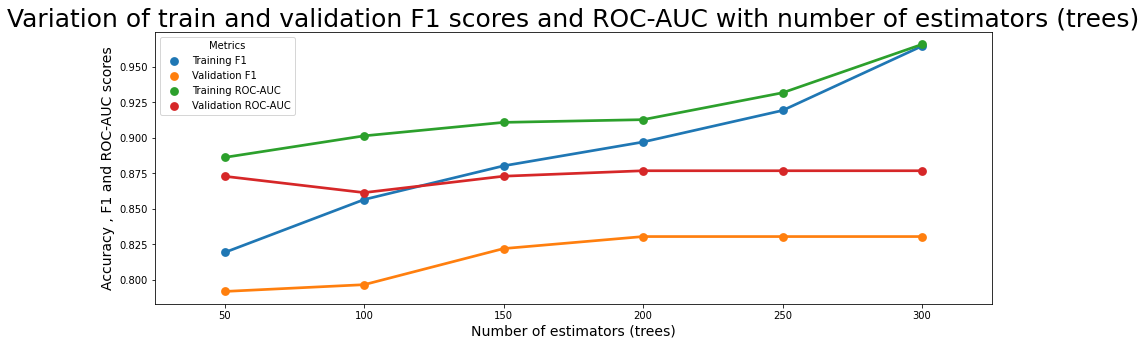

In [ ]:
#We will now see how our model perfoms with different number of learners/estimators

VALID_SIZE=0.35
x_train, x_valid, y_train, y_valid = train_test_split(X_T,y_T, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

n_est = [50, 100,150,200,250,300]
train_f1_ad = []
val_f1_ad = []
train_roc_ad=[]
val_roc_ad=[]
estimators = []

#finding optimal value of no of estimators

for n in n_est:
    clf = AdaBoostClassifier(random_state=RANDOM_STATE,learning_rate=1,n_estimators=n)
    #n_estimators are number of weak learners used , here WL is DT by default
    clf.fit(x_train, y_train.values)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_valid)

    train_f1 = f1_score(y_train, y_pred_train)
    train_roc = roc_auc_score(y_train, y_pred_train)
    val_f1 = f1_score(y_valid, y_pred_val)
    val_roc = roc_auc_score(y_valid, y_pred_val)

    train_f1_ad.append(train_f1)
    train_roc_ad.append(train_roc)
    val_f1_ad.append(val_f1)
    val_roc_ad.append(val_roc)
    estimators.append(n)

Estimators_ada = {"Training F1": train_f1_ad, "Validation F1": val_f1_ad, "Training ROC-AUC": train_roc_ad,"Validation ROC-AUC":val_roc_ad,"Number of estimators": estimators}
Estimators_ada_df = pd.DataFrame.from_dict(Estimators_ada)

plot_df = Estimators_ada_df.melt('Number of estimators', var_name='Metrics', value_name="Values")
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Number of estimators", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.xlabel('Number of estimators (trees)', fontsize=14)
plt.ylabel('Accuracy , F1 and ROC-AUC scores', fontsize=14)
plt.title('Variation of train and validation F1 scores and ROC-AUC with number of estimators (trees)', fontsize=25)
plt.show()

## We can see that: 
1. F1 score on validation set seems to be **highest** when the no. of estimators is **200**
2. Also it seems to be constant after 200 trees, therefore to reduce time complexity, 200 is a good choice.


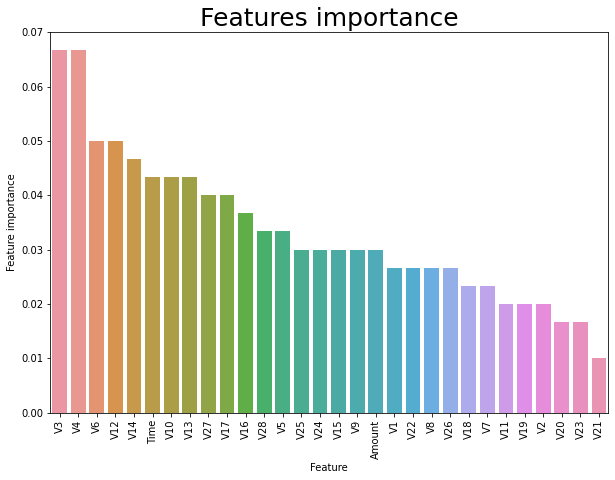

In [ ]:
# let's find the importance of each features in the model

tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,7))
plt.title('Features importance',fontsize=25)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## Therefore, now we will test the performance of these parameters (which we obtained above) on our test data.

*   Number of estimators = **200**
*   Split = **0.35**

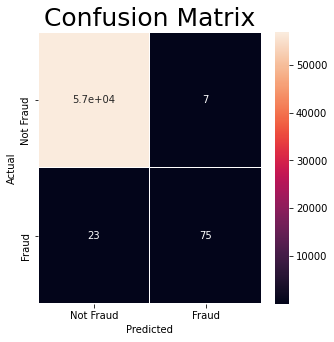

Final accuracy= 0.9994733330992591
Final Precision = 0.9146341463414634
Final Recall= 0.7653061224489796
Final F1 score= 0.8333333333333334
Final ROC-AUC= 0.8825915108587048


In [ ]:
NO_OF_ESTIMATORS= 200
x_train, x_valid, y_train, y_valid = train_test_split(X_T,y_T, test_size=0.35, random_state=RANDOM_STATE, shuffle=True)

clf = AdaBoostClassifier(random_state=RANDOM_STATE,learning_rate=1,n_estimators=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(X_test)

#Plotting Confusion Matrix to see Type 1 and Type 2 errors
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,linewidths=.2)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

print("Final accuracy=",accuracy_score(y_test, y_pred))
print("Final Precision =",precision_score(y_test,y_pred))
print("Final Recall=",recall_score(y_test,y_pred))
print("Final F1 score=",f1_score(y_test,y_pred))
print("Final ROC-AUC=",roc_auc_score(y_test, y_pred))

# **NEURAL NETWORK**

In [112]:
df=pd.read_csv('creditcard.csv')

In [113]:
print(df.shape)
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(284807, 31)
(283726, 31)


In [114]:
y = df['Class']
X = df.drop('Class', axis=1)

In [115]:
############# Separating Test Data from Original Data ##############
X_T, X_test, y_T, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## We will now check how the train and validation F1 score vary with the split ratio between train and validation set.

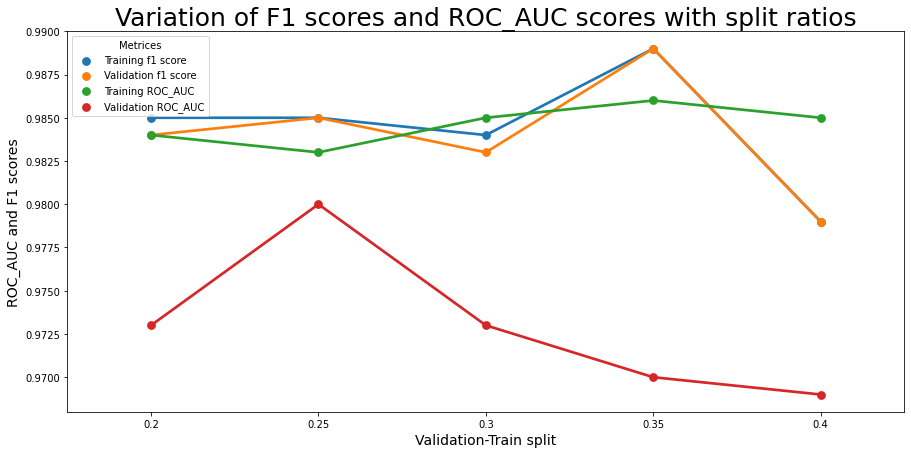

In [116]:
fs_train=[]
fs_val=[]
rocauc_train=[]
rocauc_val=[]  
split = [0.2,0.25,0.3,0.35,0.4]
for i in split:
    X_train , X_val, y_train, y_val = train_test_split(X_T, y_T, test_size=i, random_state=1)
    # print('Original dataset shape %s' % Counter(y_train))
    rus = RandomUnderSampler(sampling_strategy='all', random_state=60)
    X_res, y_res = rus.fit_resample(X_train, y_train)
    # print('Resampled dataset shape %s' % Counter(y_res))

    clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=200, max_iter=300, activation='relu', solver='adam',random_state=1))])
    clf_pipe.fit(X_res, y_res)
    
    y_pred_train = clf_pipe.predict(X_train)
    
    fs_train.append(f1_score(y_train, y_pred_train, average='weighted').round(3))
    rocauc_train.append(roc_auc_score(y_train, clf_pipe.predict_proba(X_train)[:,1], average='weighted').round(3))

    y_pred_val= clf_pipe.predict(X_val)

    fs_val.append(f1_score(y_val, y_pred_val, average='weighted').round(3))
    rocauc_val.append(roc_auc_score(y_val, clf_pipe.predict_proba(X_val)[:,1], average='weighted').round(3))

NN = {"Training f1 score": fs_train, "Validation f1 score": fs_val, "Training ROC_AUC": rocauc_train, "Validation ROC_AUC":rocauc_val, "Split": split }
NN_df = pd.DataFrame.from_dict(NN)

plot_df = NN_df.melt('Split',var_name='Metrices',value_name="Values")
fig,ax = plt.subplots(figsize=(15,7))
sns.pointplot(x="Split", y="Values",hue="Metrices", data=plot_df,ax=ax)
plt.xlabel('Validation-Train split',fontsize=14)
plt.ylabel('ROC_AUC and F1 scores',fontsize=14)
plt.title('Variation of F1 scores and ROC_AUC scores with split ratios',fontsize=25)
plt.show()

## We can see that: 



1.  Training F1 score and validation F1 score's variation is similar.
2.  F1 score on validation set is **maximised** when the splitting ratio is **0.35**








In [117]:
# Therefore, we can now split the data into traina nd validation sets with this splitting ratio

split=0.35
X_train , X_val, y_train, y_val = train_test_split(X_T, y_T, test_size=split, random_state=42)

## We will now check how the train and validation F1 score vary with the size of hidden layer.

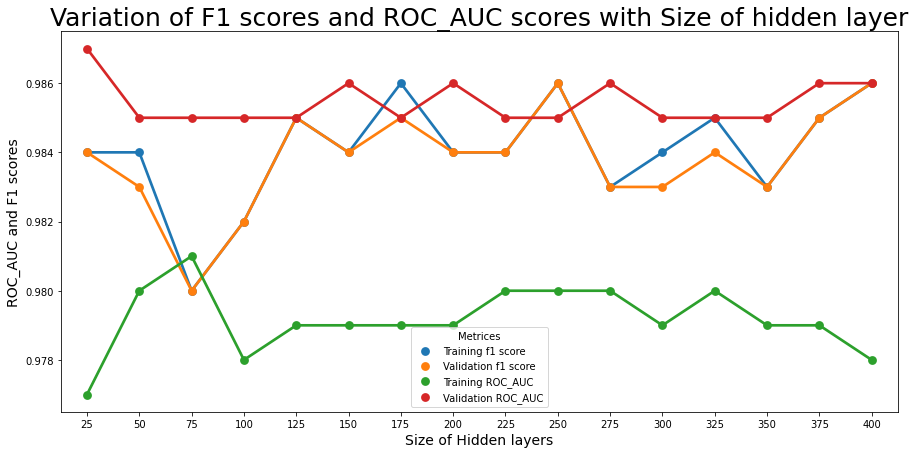

In [118]:
fs_train=[]
fs_val=[]
rocauc_train=[]
rocauc_val=[]  
size_of_layers= range(25,401,25)
for i in size_of_layers:
    rus = RandomUnderSampler(sampling_strategy='all', random_state=60)
    X_res, y_res = rus.fit_resample(X_train, y_train)

    clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=i, max_iter= 500, activation='relu', solver='adam',random_state=40))])
    clf_pipe.fit(X_res, y_res)
    
    y_pred_train = clf_pipe.predict(X_train)
    
    fs_train.append(f1_score(y_train, y_pred_train, average='weighted').round(3))
    rocauc_train.append(roc_auc_score(y_train, clf_pipe.predict_proba(X_train)[:,1], average='weighted').round(3))

    y_pred_val= clf_pipe.predict(X_val)

    fs_val.append(f1_score(y_val, y_pred_val, average='weighted').round(3))
    rocauc_val.append(roc_auc_score(y_val, clf_pipe.predict_proba(X_val)[:,1], average='weighted').round(3))

NN= {"Training f1 score": fs_train, "Validation f1 score": fs_val, "Training ROC_AUC": rocauc_train, "Validation ROC_AUC":rocauc_val, "Size_of_layers": size_of_layers }
NN_df= pd.DataFrame.from_dict(NN)

plot_df = NN_df.melt('Size_of_layers',var_name='Metrices',value_name="Values")
fig,ax = plt.subplots(figsize=(15,7))
sns.pointplot(x="Size_of_layers", y="Values",hue="Metrices", data=plot_df,ax=ax)
plt.xlabel('Size of Hidden layers',fontsize=14)
plt.ylabel('ROC_AUC and F1 scores',fontsize=14)
plt.title('Variation of F1 scores and ROC_AUC scores with Size of hidden layer',fontsize=25)
plt.show()

## We can see that:

1.   **F1 score** on validation set is **maximised** when size of hidden layers= **250** 
2.   Training F1 score and validation F1 score's variation is very similar


## We will now check how the train and validation F1 score vary with no. of iterations.

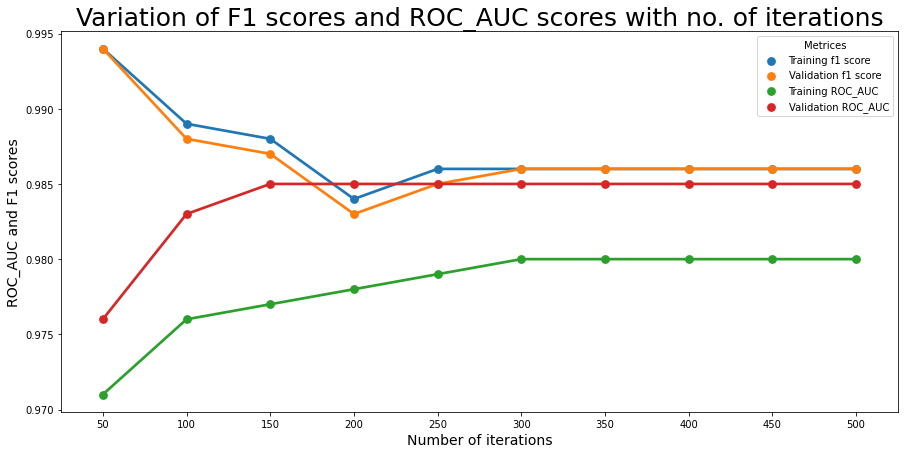

In [ ]:
size_of_layers= 250
No_of_iterations= range(50,501,50)
fs_train=[]
fs_val=[]
rocauc_train=[]
rocauc_val=[]
for i in No_of_iterations:
    rus = RandomUnderSampler(sampling_strategy='all', random_state=60)
    X_res, y_res = rus.fit_resample(X_train, y_train)
    # print('Resampled dataset shape %s' % Counter(y_res))
    clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter= i, activation='relu', solver='adam',random_state=40))])
    clf_pipe.fit(X_res, y_res)
    
    y_pred_train = clf_pipe.predict(X_train)
    
    fs_train.append(f1_score(y_train, y_pred_train, average='weighted').round(3))
    rocauc_train.append(roc_auc_score(y_train, clf_pipe.predict_proba(X_train)[:,1], average='weighted').round(3))

    y_pred_val= clf_pipe.predict(X_val)

    fs_val.append(f1_score(y_val, y_pred_val, average='weighted').round(3))
    rocauc_val.append(roc_auc_score(y_val, clf_pipe.predict_proba(X_val)[:,1], average='weighted').round(3))
NN= {"Training f1 score": fs_train, "Validation f1 score": fs_val, "Training ROC_AUC": rocauc_train, "Validation ROC_AUC":rocauc_val, "Number_of_iterations": No_of_iterations }
NN_df= pd.DataFrame.from_dict(NN)

plot_df = NN_df.melt('Number_of_iterations',var_name='Metrices',value_name="Values")
fig,ax = plt.subplots(figsize=(15,7))
sns.pointplot(x="Number_of_iterations", y="Values",hue="Metrices", data=plot_df,ax=ax)
plt.xlabel('Number of iterations',fontsize=14)
plt.ylabel('ROC_AUC and F1 scores',fontsize=14)
plt.title('Variation of F1 scores and ROC_AUC scores with no. of iterations',fontsize=25)
plt.show()

## We can see that:

1. All scores settle after number of iterations= **400** and their value remains constant for further iterations (converged)
2.Since time complexity was not an issue here, we chose 400 instead of 300.
3. Training F1 score and validation F1 score's variation is very similar.
 

In [ ]:
# So, these are the values which we will be using for further analysis 
No_of_iterations= 400
split=0.35
size_of_layers= 250

## We will now check how the train and validation F1 score vary with different activation functions.

In [ ]:
# We already splitted the data into train and val sets

rus = RandomUnderSampler(sampling_strategy='all', random_state=60)
X_res, y_res = rus.fit_resample(X_train, y_train)

def evaluate_model(clf, y, y_p):
    s1 = accuracy_score(y, y_p).round(4)
    s2 = precision_score(y, y_p, average='weighted').round(4)
    s3 = recall_score(y, y_p, average='weighted').round(4)
    s4 = f1_score(y, y_p, average='weighted').round(4)
    s5 = roc_auc_score(y, clf.predict_proba(X_val)[:,1], average='weighted').round(4)
    print("Accuracy =", s1)
    print("Precision =", s2)
    print("Recall =", s3)
    print("f1 score =", s4)
    print("ROC_AUC =", s5)

clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter=No_of_iterations, activation='relu', solver='adam',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred_val = clf_pipe.predict(X_val)
print("Rectified Linear Activation(ReLU) as activation function")
evaluate_model(clf_pipe, y_val, y_pred_val) 

clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter=No_of_iterations, activation='tanh', solver='adam',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred_val = clf_pipe.predict(X_val)
print("Hyperbolic Tangent(Tanh) as activation function")
evaluate_model(clf_pipe, y_val, y_pred_val) 

clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter=No_of_iterations, activation='logistic', solver='adam',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred_val = clf_pipe.predict(X_val)
print("Logistic(sigmoid) as activation function")
evaluate_model(clf_pipe, y_val, y_pred_val) 


Rectified Linear Activation(ReLU) as activation function
Accuracy = 0.9771
Precision = 0.9984
Recall = 0.9771
f1 score = 0.987
ROC_AUC = 0.9861
Hyperbolic Tangent(Tanh) as activation function
Accuracy = 0.9696
Precision = 0.9984
Recall = 0.9696
f1 score = 0.9832
ROC_AUC = 0.9842
Logistic(sigmoid) as activation function
Accuracy = 0.9701
Precision = 0.9984
Recall = 0.9701
f1 score = 0.9834
ROC_AUC = 0.9842


## We can see that
'**ReLU**' activation function is slightly better than others in maximising F1 score

## We will now check how the train and validation F1 score vary with different solvers.

In [ ]:
clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter=No_of_iterations, activation='relu', solver='adam',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred_val = clf_pipe.predict(X_val)
print("ReLU and ADAM")
evaluate_model(clf_pipe, y_val, y_pred_val) 

clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter=No_of_iterations, activation='relu', solver='sgd',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred_val = clf_pipe.predict(X_val)
print("ReLU and SGD")
evaluate_model(clf_pipe, y_val, y_pred_val) 

clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=size_of_layers, max_iter=No_of_iterations, activation='relu', solver='lbfgs',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred_val = clf_pipe.predict(X_val)
print("ReLU and LBFGS")
evaluate_model(clf_pipe, y_val, y_pred_val) 

ReLU and ADAM
Accuracy = 0.9771
Precision = 0.9984
Recall = 0.9771
f1 score = 0.987
ROC_AUC = 0.9861
ReLU and SGD
Accuracy = 0.9986
Precision = 0.999
Recall = 0.9986
f1 score = 0.9987
ROC_AUC = 0.9826
ReLU and LBFGS
Accuracy = 0.9051
Precision = 0.9984
Recall = 0.9051
f1 score = 0.9487
ROC_AUC = 0.9348


## We can see that
'**sgd**' is better solver than others in maximising F1 scores

## Therefore, now we will test the performance of these parameters (which we obtained above) on our test data.

*   Size of hidden layer = **250**
*   Number of iterations = **400**
*   Split = **0.35**
*   Optimiser = **sgd**
*   Activation function= **ReLU** 




Accuracy = 0.9986
Precision = 0.9989
Recall = 0.9986
f1 score = 0.9987
ROC_AUC = 0.9576


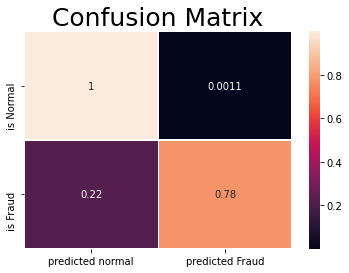

In [ ]:
X_train , X_val, y_train, y_val = train_test_split(X_T, y_T, test_size=0.35, random_state=20)
rus = RandomUnderSampler(sampling_strategy='all', random_state=60)
X_res, y_res = rus.fit_resample(X_train, y_train)
clf_pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', MLPClassifier(hidden_layer_sizes=250, max_iter=400, activation='relu', solver='sgd',random_state=20))])
clf_pipe.fit(X_res, y_res)
y_pred = clf_pipe.predict(X_test)

def evaluate_model(clf, y_test, y_pred):
    s1 = accuracy_score(y_test, y_pred).round(4)
    s2 = precision_score(y_test, y_pred, average='weighted').round(4)
    s3 = recall_score(y_test, y_pred, average='weighted').round(4)
    s4 = f1_score(y_test, y_pred, average='weighted').round(4)
    s5 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1], average='weighted').round(4)
    print("Accuracy =", s1)
    print("Precision =", s2)
    print("Recall =", s3)
    print("f1 score =", s4)
    print("ROC_AUC =", s5)

       #Plotting Confusion Matrix 
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    sns.heatmap(cm,xticklabels=['predicted normal', 'predicted Fraud'],yticklabels=['is Normal', 'is Fraud'],annot=True,linewidths=.2)
    plt.title('Confusion Matrix', fontsize=25)
 
evaluate_model(clf_pipe, y_test, y_pred)    

In [ ]:
# Accuracy = 0.9986
# Precision = 0.9989
# Recall = 0.9986
# f1 score = 0.9987
# ROC_AUC = 0.9576

# **RANDOM FOREST CLASSIFIER**

In [ ]:
df = pd.read_csv('creditcard.csv')
df.drop_duplicates(keep='first', inplace=True)
X = df.drop(columns='Class') #Features
y = df['Class']     

In [ ]:
############# Separating Test Data from Original Data ##############
X_T, X_test, y_T, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## We will now check how the train and validation F1 score vary with the split ratio between train and validation set.

In [ ]:
Test_size = [0.20,0.25,0.30,0.35,0.40]
train_f1_rf=[]
train_auc_rf=[]
val_f1_rf=[]
val_auc_rf=[]
for size in Test_size:
  X_train,X_val,y_train,y_val = train_test_split(X_T,y_T,test_size=size,stratify=y_T,random_state=1)
  rf_clf = RandomForestClassifier(n_estimators=90,max_depth=3,min_samples_leaf = 3)
  rf_clf.fit(X_train,y_train)
  y_pred_train_rf = rf_clf.predict(X_train)
  y_pred_val_rf = rf_clf.predict(X_val)

  train_f1 = f1_score(y_train,y_pred_train_rf)
  train_auc = roc_auc_score(y_train,y_pred_train_rf)
  val_f1 = f1_score(y_val,y_pred_val_rf)
  val_auc = roc_auc_score(y_val,y_pred_val_rf)  
  train_f1_rf.append(train_f1)
  train_auc_rf.append(train_auc)
  val_f1_rf.append(val_f1)
  val_auc_rf.append(val_auc)

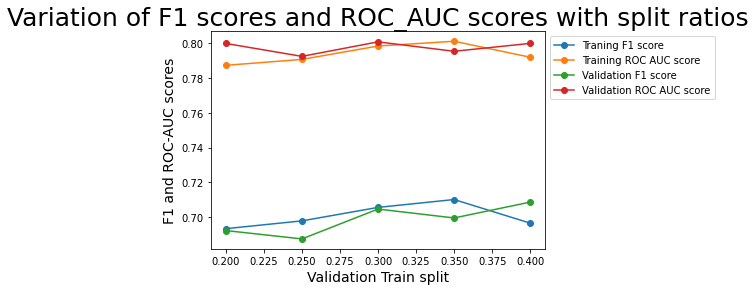

In [ ]:
plt.plot(Test_size,train_f1_rf,'o-')
plt.plot(Test_size,train_auc_rf,'o-')
plt.plot(Test_size,val_f1_rf,'o-')
plt.plot(Test_size,val_auc_rf,'o-')
plt.xlabel('Validation Train split', fontsize=14)
plt.ylabel('F1 and ROC-AUC scores',fontsize=14)
plt.legend(['Traning F1 score','Training ROC AUC score','Validation F1 score','Validation ROC AUC score'],loc='upper left',bbox_to_anchor=(1,1))
plt.title('Variation of F1 scores and ROC_AUC scores with split ratios',fontsize=25)
plt.show()

## We can see that: 
1. F1 score on validation set is **maximised** when the split ratio is **0.3**
2. There isn't much difference between F1 score at 0.4 and 0.3, so to reduce time complexity, we chose 0.3

In [ ]:
size=0.3
n_est=[60,70,80,90,100,110,120,130,140]

X_train,X_val,y_train,y_val = train_test_split(X_T,y_T,test_size=size,stratify= y_T,random_state=1)

## We will now check how the train and validation F1 score vary with the Number of estimators.

In [ ]:
train_f1_rf=[]
train_auc_rf=[]
val_f1_rf=[]
val_auc_rf=[]
for n in n_est:
  rf_clf = RandomForestClassifier(n_estimators=n,max_depth=3,min_samples_leaf =10)
  rf_clf.fit(X_train,y_train)
  y_pred_train_rf = rf_clf.predict(X_train)
  y_pred_val_rf = rf_clf.predict(X_val)

  train_f1 = f1_score(y_train,y_pred_train_rf)
  train_auc = roc_auc_score(y_train,y_pred_train_rf)
  val_f1 = f1_score(y_val,y_pred_val_rf)
  val_auc = roc_auc_score(y_val,y_pred_val_rf)  
  train_f1_rf.append(train_f1)
  train_auc_rf.append(train_auc)
  val_f1_rf.append(val_f1)
  val_auc_rf.append(val_auc)

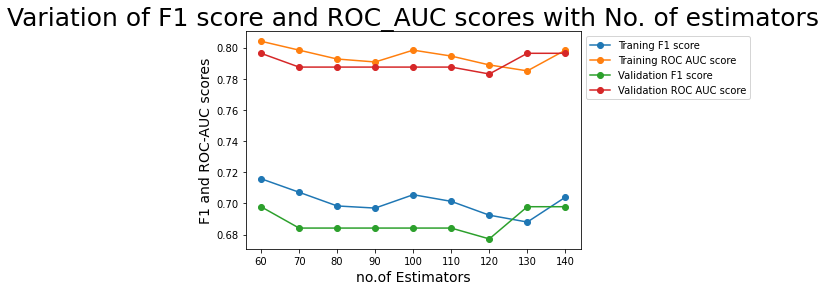

In [ ]:
plt.plot(n_est,train_f1_rf,'o-')
plt.plot(n_est,train_auc_rf,'o-')
plt.plot(n_est,val_f1_rf,'o-')
plt.plot(n_est,val_auc_rf,'o-')
plt.xlabel('no.of Estimators',fontsize=14)
plt.ylabel('F1 and ROC-AUC scores',fontsize=14)
plt.legend(['Traning F1 score','Training ROC AUC score','Validation F1 score','Validation ROC AUC score'],loc='upper left',bbox_to_anchor=(1,1));
plt.title('Variation of F1 score and ROC_AUC scores with No. of estimators',fontsize=25)
plt.show()

## We can see that: 
F1 score on validation set is **maximised** when the no. of estimators is **130**

## We will now check how the train and validation F1 score vary with the maximum depth.

In [ ]:
size=0.3
n_est=130
d=[2,4,6,8,10]

X_train,X_val,y_train,y_val = train_test_split(X_T,y_T,test_size=size,stratify=y_T,random_state=1)
train_f1_rf=[]
train_auc_rf=[]
val_f1_rf=[]
val_auc_rf=[]
for i in d:
  rf_clf = RandomForestClassifier(n_estimators=n_est,max_depth=i,min_samples_leaf =5)
  rf_clf.fit(X_train,y_train)
  y_pred_train_rf = rf_clf.predict(X_train)
  y_pred_val_rf = rf_clf.predict(X_val)

  train_f1_rf.append(f1_score(y_train,y_pred_train_rf))
  train_auc_rf.append(roc_auc_score(y_train,y_pred_train_rf))
  val_f1_rf.append(f1_score(y_val,y_pred_val_rf))
  val_auc_rf.append(roc_auc_score(y_val,y_pred_val_rf))

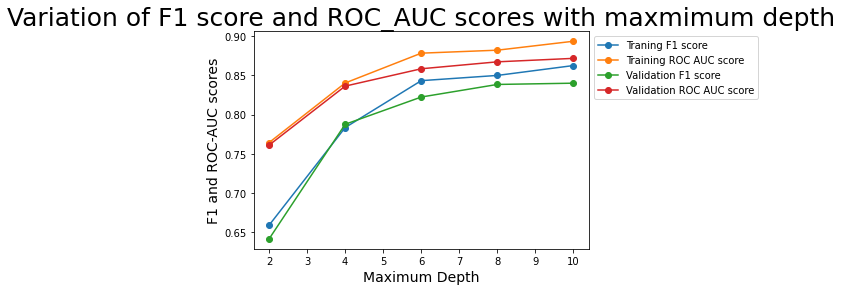

In [ ]:
plt.plot(d,train_f1_rf,'o-')
plt.plot(d,train_auc_rf,'o-')
plt.plot(d,val_f1_rf,'o-')
plt.plot(d,val_auc_rf,'o-')
plt.xlabel('Maximum Depth',fontsize=14)
plt.ylabel('F1 and ROC-AUC scores',fontsize=14)
plt.legend(['Traning F1 score','Training ROC AUC score','Validation F1 score','Validation ROC AUC score'],loc='upper left',bbox_to_anchor=(1,1));
plt.title('Variation of F1 score and ROC_AUC scores with maxmimum depth',fontsize=25)
plt.show()

## We can see that: 
F1 score on validation set is **maximised** when the maximum depth is **10** and seems to converge from max depth = 8

## We will now check how the train and validation F1 score vary with the number of sample leaf.

In [ ]:
size=0.3
n_est=130
d= 10
leaf=[2,4,6,8,10]

X_train,X_val,y_train,y_val = train_test_split(X_T,y_T,test_size=size,stratify=y_T,random_state=42)
train_f1_rf=[]
train_auc_rf=[]
val_f1_rf=[]
val_auc_rf=[]
estimators=[]
for i in leaf:
  rf_clf = RandomForestClassifier(n_estimators=n_est,max_depth=d,min_samples_leaf=i)
  rf_clf.fit(X_train,y_train)
  y_pred_train_rf = rf_clf.predict(X_train)
  y_pred_val_rf = rf_clf.predict(X_val)

  train_f1_rf.append(f1_score(y_train,y_pred_train_rf))
  train_auc_rf.append(roc_auc_score(y_train,y_pred_train_rf))
  val_f1_rf.append(f1_score(y_val,y_pred_val_rf))
  val_auc_rf.append(roc_auc_score(y_val,y_pred_val_rf))

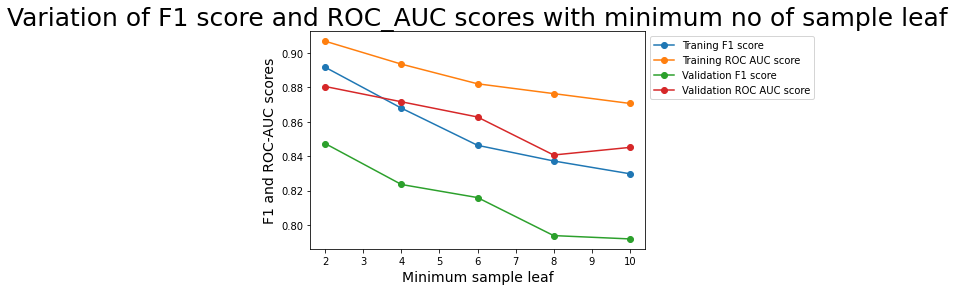

In [ ]:
plt.plot(leaf,train_f1_rf,'o-')
plt.plot(leaf,train_auc_rf,'o-')
plt.plot(leaf,val_f1_rf,'o-')
plt.plot(leaf,val_auc_rf,'o-')
plt.xlabel('Minimum sample leaf',fontsize=14)
plt.ylabel('F1 and ROC-AUC scores',fontsize=14)
plt.legend(['Traning F1 score','Training ROC AUC score','Validation F1 score','Validation ROC AUC score'],loc='upper left',bbox_to_anchor=(1,1));
plt.title('Variation of F1 score and ROC_AUC scores with minimum no of sample leaf',fontsize=25)
plt.show()

## We can see that: 
F1 score on validation set is **maximised** when the no. of sample leaf is **2**

## Therefore, now we will test the performance of these parameters (which we obtained above) on our test data.

*   Number of estimators = **130**
*   Split = **0.3**
*   Maximum depth = **10**
*   Number of leaf= **2** 


In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_T,y_T,test_size=0.3,stratify =y_T,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=130,max_depth=10,min_samples_leaf =2)
rf_clf.fit(X_train,y_train)
y_pred_test_rf = rf_clf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred_test_rf))
print("Precision: ",precision_score(y_test,y_pred_test_rf))
print("Recall: ",recall_score(y_test,y_pred_test_rf))
print("F1 Score: ",f1_score(y_test,y_pred_test_rf))
print("AUC Score: ",roc_auc_score(y_test, y_pred_test_rf))
# print("Confusion Matrix on Test Data")
# pd.crosstab(y_test, y_pred_test_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.9995770627004547
Precision Accuracy:  0.9397590361445783
Recall Accuracy:  0.8041237113402062
Test F1 Score:  0.8666666666666667
Test AUC Score:  0.9020177242644296


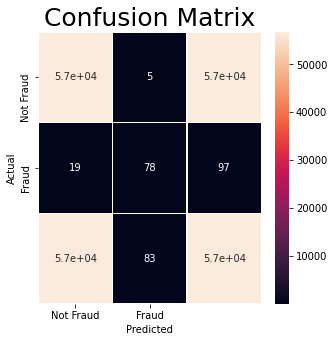

In [ ]:
cm = pd.crosstab(y_test, y_pred_test_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,  xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'], annot=True,ax=ax1,linewidths=.2)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

# **Comparing models on the basis of f1 score on test data**


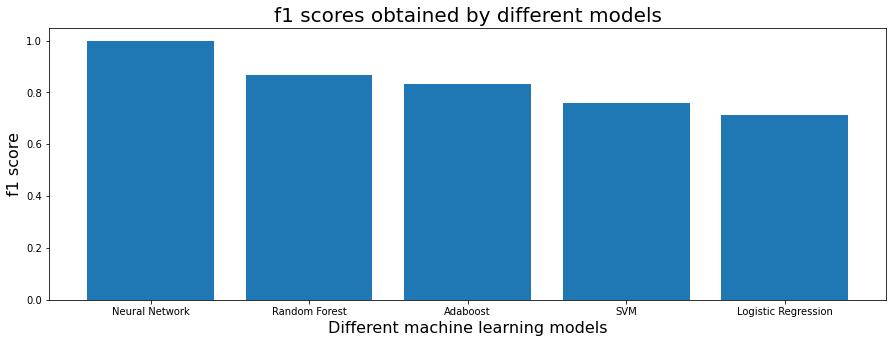

In [ ]:
models=['Neural Network','Random Forest','Adaboost','SVM','Logistic Regression']
fig, ax = plt.subplots(figsize=(15, 5))
f1=[0.9987,0.86667,0.8333,0.7586,0.7126]
plt.bar(models,f1)
plt.title('f1 scores obtained by different models',fontsize=20)
plt.xlabel('Different machine learning models',fontsize=16)
plt.ylabel('f1 score',fontsize=16)
plt.show()